# Regression as Hypothesis Testing

Linear regression is not just a predictive tool.
It is a **generalized hypothesis testing framework**.

In this notebook, we show that:
- each regression coefficient corresponds to a hypothesis test
- t-tests and ANOVA are special cases of regression
- regression allows controlled, multivariate inference


### 🟦 Imports & Data

In [1]:
import sys
from pathlib import Path

# Get project root: notebooks/ → project/
PROJECT_ROOT = Path().resolve().parent
sys.path.insert(0, str(PROJECT_ROOT))

print("Added to path:", PROJECT_ROOT)


Added to path: /home/arun/Documents/statistics-and-atmospheric-data/fundamentals_statistics/project


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from src.data_generation import generate_student_dataset

sns.set(style="whitegrid")

df = generate_student_dataset(n=4000, random_state=42)


### 🟦 Why Regression?

Earlier notebooks tested one factor at a time.

Regression allows us to:
- test multiple hypotheses simultaneously
- control for confounding variables
- estimate adjusted effects
- quantify uncertainty with confidence intervals

This is how hypothesis testing is done in real research.


## 🟩 Part I — Simple Linear Regression

### Research Question

Does **study time** influence exam score?

We model:

$$
\text{score} = \beta_0 + \beta_1 \cdot \text{study\_hours} + \varepsilon
$$


### 🟦 Hypotheses (Coefficient Test)

For the slope coefficient:

$$
H_0: \beta_1 = 0
$$

$$
H_1: \beta_1 \neq 0
$$

This tests whether study hours have any linear effect on score.


### 🟦 Fit Simple Regression

In [3]:
model_simple = smf.ols("score ~ study_hours", data=df).fit()
model_simple.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     1007.
Date:                Sun, 11 Jan 2026   Prob (F-statistic):          2.33e-197
Time:                        13:17:25   Log-Likelihood:                -11797.
No. Observations:                4000   AIC:                         2.360e+04
Df Residuals:                    3998   BIC:                         2.361e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      90.0410      0.234    384.723      0.000      89.582      90.500
study_hours     1.1774      0.037     31.738      0.000       1.105       1.250
==============================================================================
Omnibus:                     1245.408   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3746.537
Skew:                          -1.611   Prob(JB):                         0.00
Kurtosis:                       6.477   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretation

- The slope coefficient represents the expected score increase
  per additional study hour
- The t-statistic and p-value test \( H_0: \beta_1 = 0 \)
- A narrow confidence interval indicates precise estimation

This is equivalent to a one-sample t-test on the slope.


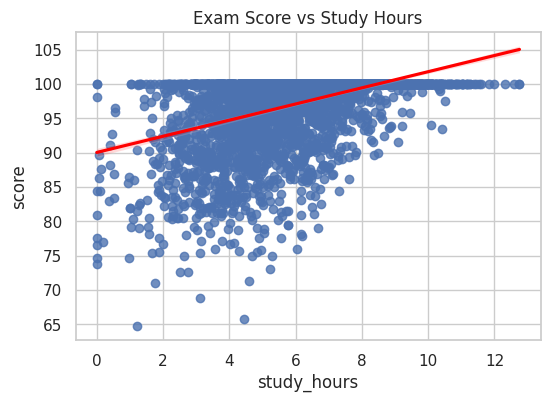

In [4]:
plt.figure(figsize=(6, 4))
sns.regplot(x="study_hours", y="score", data=df, line_kws={"color": "red"})
plt.title("Exam Score vs Study Hours")
plt.show()


## 🟩 Part II — Multiple Linear Regression


To isolate effects, we include multiple predictors:

$$
\text{score} =
\beta_0
+ \beta_1 \cdot \text{study\_hours}
+ \beta_2 \cdot \text{attendance\_rate}
+ \beta_3 \cdot \text{previous\_gpa}
+ \varepsilon
$$

Each coefficient corresponds to a **separate hypothesis test**.


### 🟦 Fit Multivariate Model

In [5]:
model_multi = smf.ols(
    "score ~ study_hours + attendance_rate + previous_gpa",
    data=df
).fit()

model_multi.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     444.6
Date:                Sun, 11 Jan 2026   Prob (F-statistic):          3.01e-249
Time:                        13:17:27   Log-Likelihood:                -11670.
No. Observations:                4000   AIC:                         2.335e+04
Df Residuals:                    3996   BIC:                         2.337e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          77.4145      0.826     93.740      0.000      75.795      79.034
study_hours         1.1911      0.036     33.117      0.000       1.121       1.262
attendance_rate     0.0970      0.007     13.556      0.000       0.083       0.111
previous_gpa        1.5861      0.179      8.861      0.000       1.235       1.937
==============================================================================
Omnibus:                     1166.144   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3380.760
Skew:                          -1.519   Prob(JB):                         0.00
Kurtosis:                       6.326   Cond. No.                         955.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Coefficient Interpretation

For each predictor $ X_i $:

$$
H_0: \beta_i = 0
$$

$$
H_1: \beta_i \neq 0
$$

Interpretation example:
> Holding attendance and GPA constant, one additional study hour
> increases the expected exam score by $ \beta_1 $ points.


## 🟩 Part III — Regression and ANOVA Connection

### Regression with Categorical Variables

ANOVA is a special case of regression using indicator variables.

We include teaching method as a categorical predictor:

$$
\text{score} = \beta_0 + \beta_1 D_B + \beta_2 D_C + \varepsilon
$$

where $ D_B, D_C $ are dummy variables.


### 🟦 Regression with Categorical Variable

In [6]:
model_cat = smf.ols(
    "score ~ C(teaching_method)",
    data=df
).fit()

model_cat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     86.71
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           1.36e-37
Time:                        13:17:30   Log-Likelihood:                -12162.
No. Observations:                4000   AIC:                         2.433e+04
Df Residuals:                    3997   BIC:                         2.435e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  97.1781      0.145    669.682      0.000      96.894      97.463
C(teaching_method)[T.B]     0.9573      0.192      4.982      0.000       0.581       1.334
C(teaching_method)[T.C]    -1.6004      0.207     -7.717      0.000      -2.007      -1.194
==============================================================================
Omnibus:                     1551.078   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5339.270
Skew:                          -1.987   Prob(JB):                         0.00
Kurtosis:                       7.031   Cond. No.                         3.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Global Hypothesis Test

The overall F-test evaluates:

$$
H_0: \beta_1 = \beta_2 = \dots = 0
$$

This is **exactly the ANOVA null hypothesis**.


### 🟦 ANOVA Table from Regression

In [7]:
sm.stats.anova_lm(model_cat, typ=2)


,sum_sq,df,F,PR(>F)
C(teaching_method),4444.340556,2.0,86.713746,1.364007e-37
Residual,102429.142569,3997.0,NaN,NaN


#### Interpretation

- The F-test determines whether teaching method matters at all
- Individual coefficients compare each group to the reference category
- This unifies ANOVA and regression into a single framework


## 🟩 Part IV — Model Diagnostics (Assumptions)

### Regression Assumptions

1. Linearity
2. Independence
3. Homoscedasticity
4. Normality of residuals

Violations affect inference, not necessarily prediction.


### 🟦 Residual Diagnostics

In [8]:
residuals = model_multi.resid
fitted = model_multi.fittedvalues


#### Residuals vs Fitted

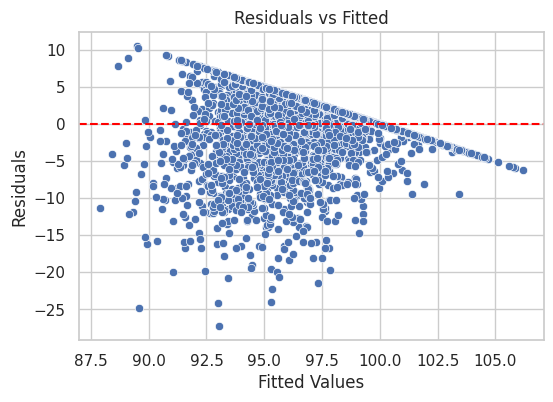

In [9]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()


#### Q–Q Plot

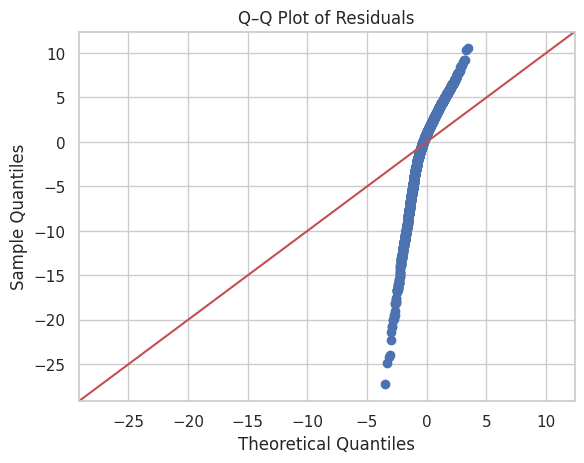

In [10]:
sm.qqplot(residuals, line="45")
plt.title("Q–Q Plot of Residuals")
plt.show()


#### Diagnostics Interpretation

- Residuals are approximately centered around zero
- No strong heteroscedasticity is visible
- Normality is reasonable given sample size

Inference from regression is reliable.


## 🟩 Part V — Confidence Intervals & Practical Meaning

### Confidence Intervals for Coefficients

Each coefficient has a confidence interval:

$$
\beta_i \pm t_{\alpha/2} \cdot SE(\beta_i)
$$

Intervals excluding zero indicate statistical significance.


### 🟦 Extract Confidence Intervals

In [11]:
model_multi.conf_int()

,0,1
Intercept,75.795403,79.033635
study_hours,1.120542,1.261565
attendance_rate,0.082987,0.111050
previous_gpa,1.235156,1.937010


## Final Summary

This notebook demonstrated that:

- Regression generalizes hypothesis testing
- Each coefficient corresponds to a null hypothesis
- ANOVA and t-tests are special cases of regression
- Diagnostics are essential for valid inference

Regression provides the most flexible and powerful
hypothesis testing framework in statistics.
